In [1]:
#resize height, width
height = 512
width = 512
grid_height = int(height/16)
grid_width = int(width/16)
print(grid_height,grid_width)

32 32


In [2]:
#Block for reading the image and converting it to YCrCb and extract Y component

import cv2
import numpy as np

img = cv2.imread('Lenna.png')

img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
Y,Cr,Cb = cv2.split(img_ycrcb)

#print(Y)
res = cv2.resize(Y,(height, width), interpolation = cv2.INTER_CUBIC)
cv2.imwrite("y.jpg",res)


True

In [3]:
#blurred = cv2.GaussianBlur(res, (3, 3), 0)
edge_image = cv2.Canny(res,50,100,1.5)
cv2.imwrite("binary-edge.jpg",edge_image)

True

In [4]:
#block for dividing image into 16 equal regions
cropped_y_regions = []
cropped_edge_regions = []
avg_gray_values = []
avg_gray_dict = {}
edge_complexity = []
edge_complexity_dict = {}

for i in range(0,16):
    cropped_y_regions.append([])
    cropped_edge_regions.append([])
    #avg_gray_values.append([])
    y = i*grid_height
    x = i*grid_width
    crop_y_img = res[y:y+grid_height, x:x+grid_width]
    crop_edge_img = edge_image[y:y+grid_height, x:x+grid_width]
    cropped_y_regions[i].append(crop_y_img)
    cropped_edge_regions[i].append(crop_edge_img)
    
    #find average gray value
    avg_gray_values.append(crop_y_img.mean())
    avg_gray_dict.update({i:crop_y_img.mean()})
    
    #calculate edge complexity
    complexity = sum(x.tolist().count(255) for x in crop_edge_img)/(grid_height*grid_width)
    edge_complexity.append(complexity)
    edge_complexity_dict.update({i:complexity})
    
    #print(complexity)
    #stacked = np.hstack((crop_y_img,crop_edge_img))
    #cv2.imwrite("cropped"+str(i)+".jpg",stacked)
    #print(len(crop_edge_img))
    #print(len(crop_edge_img[0]))
    #print("*****")
#print(cropped_regions)

In [5]:
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
#print(edge_complexity)

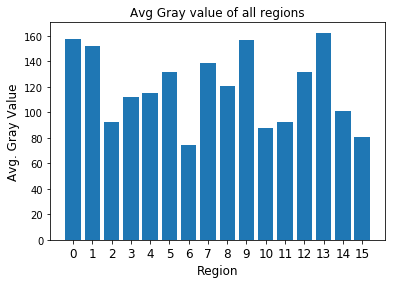

In [7]:
import matplotlib.pyplot as plt
index = np.arange(len(x))
plt.bar(index, avg_gray_values)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Avg. Gray Value', fontsize=12)
plt.xticks(index, x, fontsize=12)
plt.title('Avg Gray value of all regions')
plt.show()

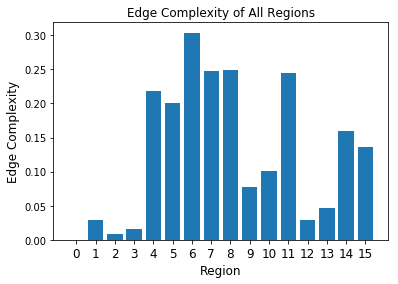

In [8]:
index = np.arange(len(x))
plt.bar(index, edge_complexity)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Edge Complexity', fontsize=12)
plt.xticks(index, x, fontsize=12)
plt.title('Edge Complexity of All Regions')
plt.show()

In [9]:
#sort regions by gry values and edge complexity

import operator

sorted_gray = sorted(avg_gray_dict.items(), key=operator.itemgetter(1))
sorted_gray_dict =  dict(sorted_gray[8:])
print(sorted_gray_dict)

sorted_complexity = sorted(edge_complexity_dict.items(), key=operator.itemgetter(1))
print(sorted_complexity)

{8: 120.947265625, 12: 131.3173828125, 5: 131.4873046875, 7: 138.4111328125, 1: 152.115234375, 9: 157.0625, 0: 157.3583984375, 13: 162.4501953125}
[(0, 0.0), (2, 0.0087890625), (3, 0.015625), (1, 0.029296875), (12, 0.029296875), (13, 0.046875), (9, 0.078125), (10, 0.1005859375), (15, 0.13671875), (14, 0.16015625), (5, 0.201171875), (4, 0.2177734375), (11, 0.244140625), (7, 0.2470703125), (8, 0.2490234375), (6, 0.3037109375)]


In [10]:
#select three regions with less complexity and high average gray values

count = 0
selected_region = []
for key,complexity in sorted_complexity:
    #print(key)
    if key in sorted_gray_dict.keys():
        #print("milse")
        selected_region.append(key)
        count = count+1
        
    if(count == 3):
        break
        
print(selected_region)

[0, 1, 12]


In [11]:
angles = [[135,90,45],[180,0,0],[225,270,315]] #Normal vector angles

In [12]:
#calculate normal vector for each point in the selected three regions

normal_vectors = []
for k in selected_region:
    temp_region = cropped_y_regions[k]
    #print(np.array(temp_region[0]))
    new_region = np.zeros((grid_height+2,grid_width+2))
    #print( new_region.shape)
    new_region[1:grid_height+1,1:grid_width+1] = temp_region[0]
    #print(new_region)
    max_index = []
    for i in range(1,grid_height+1):
        max_index.append([])
        for j in range(1,grid_width+1):
            max_value = -1
            temp_x=-1
            temp_y=-1
            max_index[i-1].append([])


            #print("item: ",b[i][j])
            for x in range(3):
                for y in range(3):
                    #print("compare with: ",b[i+x-1][j+y-1])
                    if((i+x-1 != i or j+y-1 != j) and new_region[i+x-1][j+y-1] > max_value):
                        #print("change")
                        max_value = new_region[i+x-1][j+y-1]


            for x in range(3):
                for y in range(3):
                    #print("compare with: ",b[i+x-1][j+y-1])
                    if((i+x-1 != i or j+y-1 != j) and new_region[i+x-1][j+y-1] == max_value):
                        #print("change")

                        temp_x =i
                        temp_y=j
                        angle = angles[x][y]
                        max_index[i-1][j-1].append([temp_x,temp_y,max_value-new_region[temp_x][temp_y],angle])

    normal_vectors.append(max_index)
    #print(len(max_index[0]))
    #print(max_index) 
    #print("****")
    
#print(len(normal_vectors[2][0][0]))
    
                

In [13]:
region_code = [[0,1],[1,2],[2,0]]

In [14]:
#build M vector

all_M = []
all_b = []

for code in region_code:
    m = code[0]
    n = code[1]
    
    M1 = np.zeros((2*grid_height*grid_width,4))
    M = np.ones(((2*grid_height*grid_width,5)))
    b = np.zeros((2*grid_height*grid_width,1))
    M[:,:-1] = M1

    #print(len(normal_vectors[0][0]))
    i=0
    for rows in normal_vectors[m]:   
        for points in rows:
            maximum = points[0][2]
            direction = 0
            for normals in points:
                #print(normals)
                #print("*****")

                direction = direction+normals[3]

            angle = np.deg2rad(direction)
            gray_value = cropped_y_regions[selected_region[m]][0][points[0][0]-1][points[0][1]-1]
            x = gray_value * maximum * np.cos(angle)
            y = gray_value * maximum * np.sin(angle)
            M[i][0] = x
            M[i][1] = y
            b[i][0] = gray_value
            #print(M[i][0],y)
            i = i+1

    #print(M)
    # print("*******")
    i = grid_height*grid_width
    for rows in normal_vectors[n]:   
        for points in rows:
            maximum = points[0][2]
            direction = 0
            for normals in points:
                #print(normals)
                #print("*****")

                direction = direction+normals[3]

            angle = np.deg2rad(direction)
            gray_value = cropped_y_regions[selected_region[n]][0][points[0][0]-1][points[0][1]-1]
            x = gray_value * maximum * np.cos(angle)
            y = gray_value * maximum * np.sin(angle)
            M[i][2] = x
            M[i][3] = y
            b[i][0]
            i = i+1
            
    all_M.append(M)
    all_b.append(b)
        
#print(M)

In [15]:
C = np.matrix([[-1,0,1,0,0],[0,-1,0,1,0]]) # C Matrix
#print(C.shape)

In [41]:
print(all_M[0])

[[  1.85573104e+04  -1.85573104e+04   0.00000000e+00   0.00000000e+00
    1.00000000e+00]
 [ -2.62440000e+04  -3.21396306e-12   0.00000000e+00   0.00000000e+00
    1.00000000e+00]
 [  1.85573104e+04   1.85573104e+04   0.00000000e+00   0.00000000e+00
    1.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   9.01340044e-13   1.47200000e+04
    1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   9.16410388e+03   9.16410388e+03
    1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   7.76120403e+03   7.76120403e+03
    1.00000000e+00]]


In [16]:
#calculate L(m,n)

L = []
import numpy as np
from scipy.optimize import minimize
i=0
for i in range(3):
    L.append([])
    m = region_code[i][0]
    n = region_code[i][1]
    
    fun = lambda x: np.linalg.norm(np.dot(all_M[i],x)-b[i])**2

    sol = minimize(fun, np.zeros(5), method='SLSQP', constraints={'type': 'eq', 'fun': lambda x: np.linalg.norm(np.dot(C,x))**2 })
    x = sol['x'] 

    print("for region "+str(m+1)+" and "+str(n+1)+": ",x[0],x[1])
    L[i].append(x[0])
    L[i].append(x[1])

for region 1 and 2:  -1.5925647380525764e-05 -0.0001700134182223043
for region 2 and 3:  -6.302271921457717e-05 -0.0003771043910700096
for region 3 and 1:  4.645673020035359e-09 -2.2518542344661304e-08


In [17]:
i=0
W = np.ones(3)
for i in range(3):
    m = selected_region[region_code[i][0]]
    n = selected_region[region_code[i][1]]
    print(m,n)
    wm = edge_complexity[m]
    wn = edge_complexity[n]
    print(wm,wn)
    try:
        w =  1/(wm+wn)
        W[i] = w
        
    except:
        continue
    
print(W)
    
    

0 1
0.0 0.029296875
1 12
0.029296875 0.029296875
12 0
0.029296875 0.0
[34.13333333 17.06666667 34.13333333]


In [18]:
#find final L 
final_sum = [0,0]
for i in range(3):
    temp_sum = np.dot(W[i],L[i])
    final_sum[0] = final_sum[0] + temp_sum[0]
    final_sum[1] = final_sum[1] + temp_sum[1]
    
print(final_sum)

[-0.0016190245995449791, -0.012239808249161516]


In [19]:
x = final_sum[0]*width/grid_width
y = final_sum[1]*height/grid_width

illuminant_direction =  np.tan(x/y)
print("final illuminant direction: ",np.rad2deg(illuminant_direction))

final illuminant direction:  7.623330937026386
